# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import citipy

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
data = "data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
pip install citipy

     |████████████████████████████████| 557 kB 977 kB/s eta 0:00:01
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559700 sha256=64d616e550c776975531e70341c4274158f0c5f83aae77ac9dcba953c53e83b8
  Stored in directory: /Users/analopez/Library/Caches/pip/wheels/d9/dd/68/8cc0be16282b0fcae5acb7280b47d31952f203c401923a8c1e
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


## Generate Cities List

In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

590


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [42]:
#Perform API Calls
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it's being processed (with the city number and city name).
base_url = "http://api.openweathermap.org/data/2.5/weather?"
query = base_url + "appid=" + weather_api_key + '&units=imperial' + "&q=" + city

#list and record checker
record = 0
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
windspeed = []


#append lists for reach city found and print found status
for city in cities:
    record += 1
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    query = base_url + "appid=" + weather_api_key + '&units=imperial' + "&q=" + city
    response = requests.get(query)
    city_json = response.json()
    if (str(response) == '<Response [200]>'):
        print(f'Processing Record {record}: {city}')
        city_name.append(city_json['name'])
        cloudiness.append(city_json['clouds']['all'])
        country.append(city_json['sys']['country'])
        date.append(city_json['dt'])
        humidity.append(city_json['main']['humidity'])
        lat.append(city_json['coord']['lat'])
        lng.append(city_json['coord']['lon'])
        max_temp.append(city_json['main']['temp_max'])
        windspeed.append(city_json['wind']['speed'])
    else:
        print('City not found. Skipping...')
#     # this if statement will limit the amount of cities checked, use to avoid running all 500+ cities
#     if record >= 100:
#         break
    # sleep timer to prevent bandwidth maxing for API
    time.sleep(1)

    
#Turn appended lists into dictionary
weather_dict = {'City':city_name,
                'Cloudiness':cloudiness,
                'Country':country,
                'Date':date,
                'Humidity':humidity,
                'Lat':lat,
                'Lng':lng,
                'Max Temp':max_temp,
                'Wind Speed':windspeed}

#Turn dictionary into dataframe
weather_df = pd.DataFrame(weather_dict)

City not found. Skipping...
Processing Record 2: dikson
Processing Record 3: rikitea
Processing Record 4: caconda
Processing Record 5: san quintin
Processing Record 6: nikolskoye
Processing Record 7: port elizabeth
City not found. Skipping...
Processing Record 9: nanortalik
Processing Record 10: atuona
Processing Record 11: jamestown
Processing Record 12: georgetown
Processing Record 13: cape town
Processing Record 14: busselton
Processing Record 15: airai
Processing Record 16: ushuaia
Processing Record 17: butaritari
Processing Record 18: cockburn town
Processing Record 19: provideniya
Processing Record 20: yeppoon
Processing Record 21: port blair
Processing Record 22: lavrentiya
Processing Record 23: firovo
City not found. Skipping...
Processing Record 25: lorengau
Processing Record 26: mpika
Processing Record 27: carutapera
Processing Record 28: tiksi
Processing Record 29: hithadhoo
Processing Record 30: padang
Processing Record 31: hilo
Processing Record 32: paita
Processing Record

Convert Raw Data to DataFrame
Export the city data into a .csv.
Display the DataFrame

In [43]:
# Data Count
weather_df.count()

City          544
Cloudiness    544
Country       544
Date          544
Humidity      544
Lat           544
Lng           544
Max Temp      544
Wind Speed    544
dtype: int64

In [44]:
# Display DataFrame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Dikson,100,RU,1643681961,89,73.5069,80.5464,-0.90,19.08
1,Rikitea,95,PF,1643681962,67,-23.1203,-134.9692,78.28,5.93
2,Caconda,100,AO,1643681964,79,-13.7333,15.0667,58.14,2.57
3,San Quintín,100,MX,1643681965,73,30.4833,-115.9500,58.55,6.93
4,Nikolskoye,100,RU,1643681967,97,59.7035,30.7861,24.69,4.63


In [55]:
# Convert data strings to float

pd.to_numeric(weather_df["Cloudiness"]).astype(float)
pd.to_numeric(weather_df["Humidity"]).astype(float)
pd.to_numeric(weather_df["Lat"]).astype(float)
pd.to_numeric(weather_df["Lng"]).astype(float)
pd.to_numeric(weather_df["Max Temp"]).astype(float)
pd.to_numeric(weather_df["Wind Speed"]).astype(float)
weather_df

#Export DataFrame to CSV File
export_csv = weather_df.to_csv (data, index = None, header=True)
# counts for Dataframe

weather_df.to_csv("weather_df.csv")
weather_df.count()

City          544
Cloudiness    544
Country       544
Date          544
Humidity      544
Lat           544
Lng           544
Max Temp      544
Wind Speed    544
dtype: int64

In [56]:
weather_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Dikson,100,RU,1643681961,89,73.5069,80.5464,-0.90,19.08
1,Rikitea,95,PF,1643681962,67,-23.1203,-134.9692,78.28,5.93
2,Caconda,100,AO,1643681964,79,-13.7333,15.0667,58.14,2.57
3,San Quintín,100,MX,1643681965,73,30.4833,-115.9500,58.55,6.93
4,Nikolskoye,100,RU,1643681967,97,59.7035,30.7861,24.69,4.63
5,Port Elizabeth,100,ZA,1643681919,100,-33.9180,25.5701,73.09,4.61
6,Nanortalik,100,GL,1643681971,80,60.1432,-45.2371,24.46,12.68
7,Atuona,14,PF,1643681972,77,-9.8000,-139.0333,78.62,19.73
8,Jamestown,0,US,1643681974,54,42.0970,-79.2353,26.24,4.61
9,George Town,20,MY,1643681934,74,5.4112,100.3354,84.13,1.01


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

The closer a city is to the equator it's temperature rises to its' max. The further away from the equator the temperature decreases

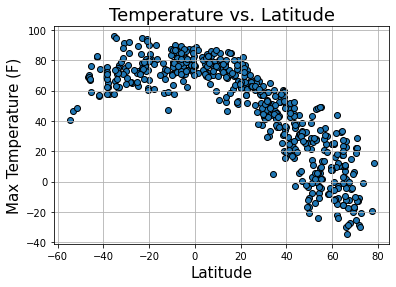

In [70]:
lat_temp_plot = plt.scatter(weather_df['Lat'],weather_df['Max Temp'],marker='o',edgecolors='black')
plt.grid()
plt.title('Temperature vs. Latitude',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Max Temperature (F)',size=15)
plt.savefig('data/Fig1.png')
plt.show()

As seen in the graph locations south of the equator seem to have a higher average humidity, while it is more varied above the equator.

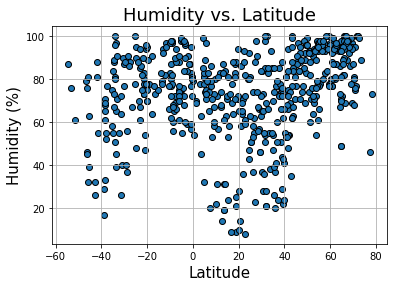

In [71]:
lat_hum_plot = plt.scatter(weather_df['Lat'],weather_df['Humidity'],marker='o',edgecolors='black')
plt.grid()
plt.title('Humidity vs. Latitude',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Humidity (%)',size=15)
plt.savefig('data/Fig2.png')
plt.show()

The is. no correlation between Claudiness and City Latitude

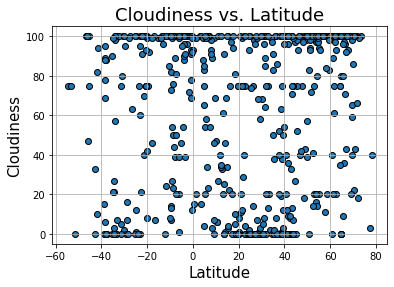

In [72]:
lat_cloud_plot = plt.scatter(weather_df['Lat'],weather_df['Cloudiness'],marker='o',edgecolors='black')
plt.grid()
plt.title('Cloudiness vs. Latitude',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Cloudiness',size=15)
plt.savefig('data/Fig3.png')
plt.show()

Wind vs City Latitude: As shown, as you move farther from the equator (latittude = 0) there is an small net increase in wind speed.

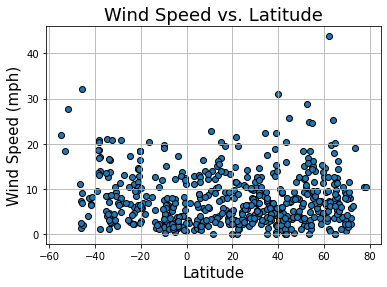

In [73]:
lat_ws_plot = plt.scatter(weather_df['Lat'],weather_df['Wind Speed'],marker='o',edgecolors='black')
plt.grid()
plt.title('Wind Speed vs. Latitude', size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Wind Speed (mph)',size=15)
plt.savefig('data/Fig4.png')
plt.show()

Linear Regression

In [67]:
# Create Northern and Southern Hemisphere DataFrames

#Northern Hemisphere (Lat > 0)
weather_df_north = weather_df[weather_df['Lat'] >= 0]

#Southern Hemisphere (Lat < 0)
weather_df_south = weather_df[weather_df['Lat'] < 0]


Northern Hemisphere - Max Temp vs. Latitude Linear Regression

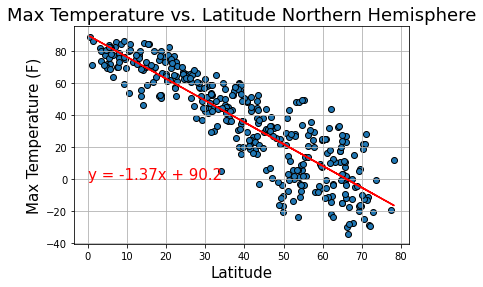

The r squared is: -0.8828890508081214


In [96]:
#setup linear regression and line equation
x_values = weather_df_north['Lat']
y_values = weather_df_north['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,0),fontsize=15,color='red')
plt.grid()
plt.title('Max Temperature vs. Latitude Northern Hemisphere',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Max Temperature (F)',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')


Southern Hemisphere - Max Temp vs. Latitude Linear Regression

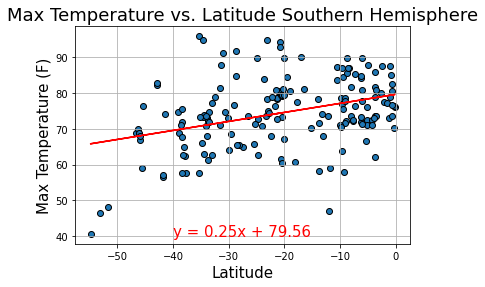

The r squared is: 0.366495550632531


In [95]:
#setup linear regression and line equation
x_values = weather_df_south['Lat']
y_values = weather_df_south['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(-40,40),fontsize=15,color='red')
plt.grid()
plt.title('Max Temperature vs. Latitude Southern Hemisphere',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Max Temperature (F)',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')

Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

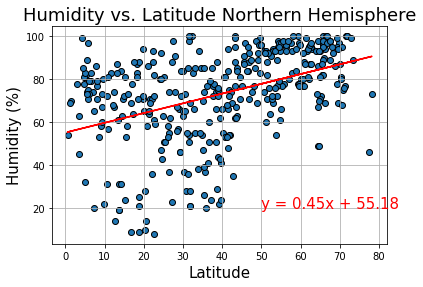

The r squared is: 0.4247815971764658


In [94]:
#setup linear regression and line equation
x_values = weather_df_north['Lat']
y_values = weather_df_north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(50,20),fontsize=15,color='red')
plt.grid()
plt.title('Humidity vs. Latitude Northern Hemisphere',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Humidity (%)',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')

Southern Hemisphere - Latitude Linear Regression vs. Humidity (%)

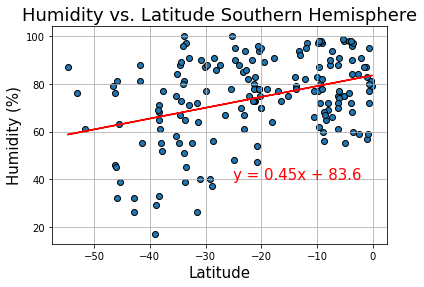

The r squared is: 0.369026434674198


In [93]:
#setup linear regression and line equation
x_values = weather_df_south['Lat']
y_values = weather_df_south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(-25,40),fontsize=15,color='red')
plt.grid()
plt.title('Humidity vs. Latitude Southern Hemisphere',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Humidity (%)',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')

Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

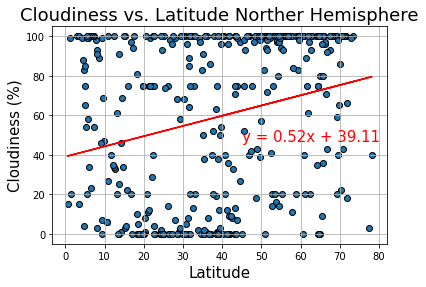

The r squared is: 0.2540250040405645


In [92]:
#setup linear regression and line equation
x_values = weather_df_north['Lat']
y_values = weather_df_north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(45,47),fontsize=15,color='red')
plt.grid()
plt.title('Cloudiness vs. Latitude Norther Hemisphere',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Cloudiness (%)',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')

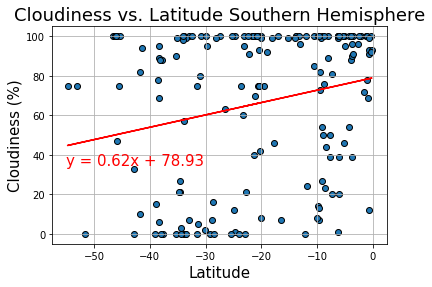

The r squared is: 0.22808443603196774


In [91]:
#setup linear regression and line equation
x_values = weather_df_south['Lat']
y_values = weather_df_south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(-55,35),fontsize=15,color='red')
plt.grid()
plt.title('Cloudiness vs. Latitude Southern Hemisphere',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Cloudiness (%)',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')

Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

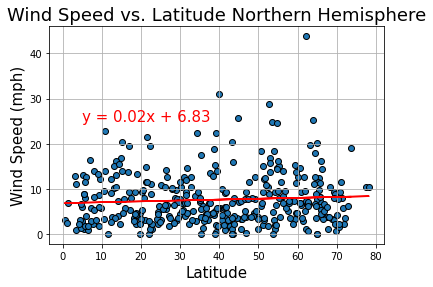

The r squared is: 0.0678706770510907


In [100]:
#setup linear regression and line equation
x_values = weather_df_north['Lat']
y_values = weather_df_north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(5,25),fontsize=15,color='red')
plt.grid()
plt.title('Wind Speed vs. Latitude Northern Hemisphere',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Wind Speed (mph)',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')

Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

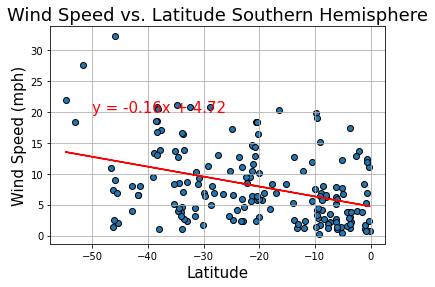

The r squared is: -0.37273711116165326


In [102]:
#setup linear regression and line equation
x_values = weather_df_south['Lat']
y_values = weather_df_south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(-50,20),fontsize=15,color='red')
plt.grid()
plt.title('Wind Speed vs. Latitude Southern Hemisphere',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Wind Speed (mph)',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')